In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("diabetes.csv")

In [12]:
columns = data.columns
columns = [col_name for col_name in columns if not col_name=="Outcome"]

In [14]:
columns#take column names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


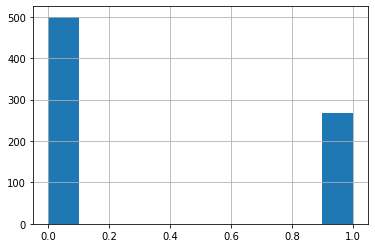

In [5]:
data["Outcome"].hist()

In [6]:
#take except outcome in X and outcome in Y
y = data["Outcome"]
X = data.drop(["Outcome"], axis=1)


In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
#scale values
scaler = MinMaxScaler()
X[columns] = scaler.fit_transform(X)

In [17]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [19]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3) #splitting

In [20]:
train_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
645,0.117647,0.788945,0.606557,0.353535,0.520095,0.587183,0.023911,0.150000
625,0.235294,0.452261,0.721311,0.474747,0.063830,0.561848,0.121264,0.133333
762,0.529412,0.447236,0.508197,0.000000,0.000000,0.335320,0.027327,0.200000
569,0.000000,0.608040,0.540984,0.303030,0.195035,0.511177,0.053373,0.200000
155,0.411765,0.763819,0.721311,0.444444,0.000000,0.745156,0.110589,0.250000


In [21]:
train_y.head()

645    0
625    0
762    0
569    1
155    1
Name: Outcome, dtype: int64

In [22]:
test_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
281,0.588235,0.648241,0.622951,0.282828,0.144208,0.535022,0.086251,0.300000
88,0.882353,0.683417,0.573770,0.323232,0.130024,0.552906,0.032024,0.366667
26,0.411765,0.738693,0.622951,0.000000,0.000000,0.587183,0.076430,0.366667
188,0.470588,0.547739,0.622951,0.393939,0.134752,0.415797,0.239966,0.166667
394,0.235294,0.793970,0.639344,0.000000,0.000000,0.490313,0.309564,0.166667


In [23]:
test_y.head()

281    0
88     1
26     1
188    1
394    1
Name: Outcome, dtype: int64

In [24]:
model = GaussianNB()
model.fit(train_X, train_y)
predictions = model.predict(test_X)

In [25]:
model.score(test_X, test_y)

0.7662337662337663